In [1]:
# Notebooks
import nbimporter
import os
import sys

# Functions from src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# Defined Functions
from utils import *

# Pandas, matplotlib, pickle, seaborn
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
def load_metrics(metric):
    all_datasets = []
    all_datasets_xaxis = []
    for dataset in datasets:
        metric_all = []
        metric_xaxis = []
        for experiment in experiments_trials:
            metric_str = "metrics/" + dataset + "-" + experiment + "_" + metric + "_comfortgan_trials.pkl"
            try:
                metric_value = pickle.load(open(metric_str, "rb"))
                metric_xaxis.append(experiment)
                if metric == "classification_test":
                    metric_all.append(metric_value[3])
                else:
                    metric_all.append(metric_value)
            except OSError:
                pass
        print(metric_all) 
        all_datasets_xaxis.append(metric_xaxis)
        all_datasets.append(metric_all)

    print(all_datasets)
    
    return all_datasets, all_datasets_xaxis


In [3]:
def barplot(list_values, xaxis, dataset, ylabel):
    """The higher the better"""
    fig = plt.figure(figsize=(15, 4))
    ax = fig.add_axes([0,0,1,1])
    x = np.arange(len(list_values))  # the label locations
    width = 0.4  # the width of the bars

    ax.bar(x, list_values, width, label=dataset)
    ax.hlines(max(list_values), 0, len(x), colors='k')
    ax.set_xticks(x)
    ax.set_xticklabels(xaxis)
    ax.tick_params(length=20, direction="inout", labelsize='large')
    ax.set_ylabel(ylabel, size=15)
    ax.legend(prop={'size': 15})

    plt.show()

# cWGAN-GP

In [4]:
datasets = ["occutherm", "cresh", "ashrae"]

# from settings on run_evaluations.sh
experiments_trials = ["64-1-100", # ashrae (final)
                      "128-1-20", # occutherm (final)
                      "128-3-80"] # cresh (final)


## Variability of generated samples
![accuracy](images/validation_variability.jpeg)

[50.12103826986419, 56.67365916033586, 51.26255985857712, 50.45961048397753]
[193.56509081204732, 324.0675553410583, 258.980559714569]
[25.038370472082384, 38.95076994905662]
[[50.12103826986419, 56.67365916033586, 51.26255985857712, 50.45961048397753], [193.56509081204732, 324.0675553410583, 258.980559714569], [25.038370472082384, 38.95076994905662]]


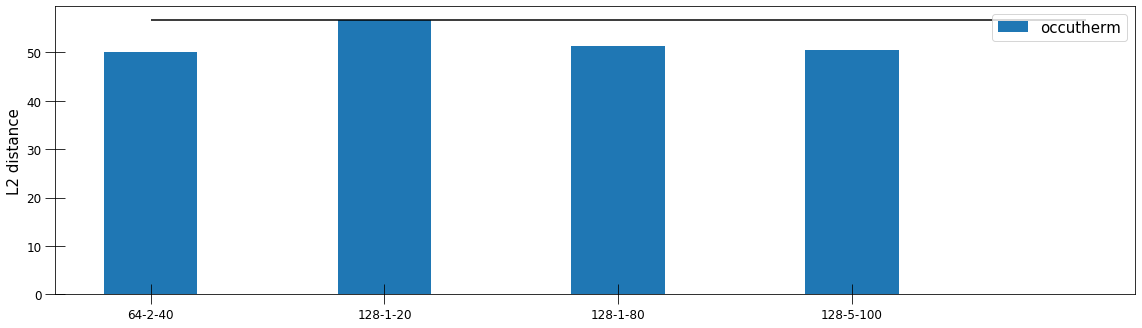

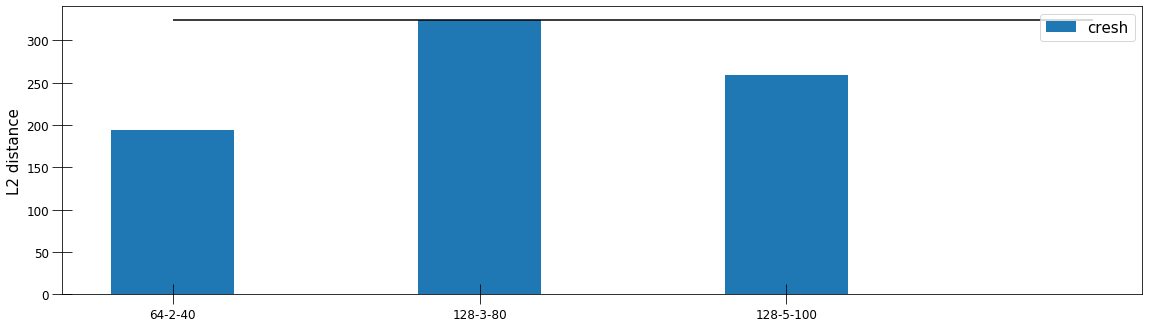

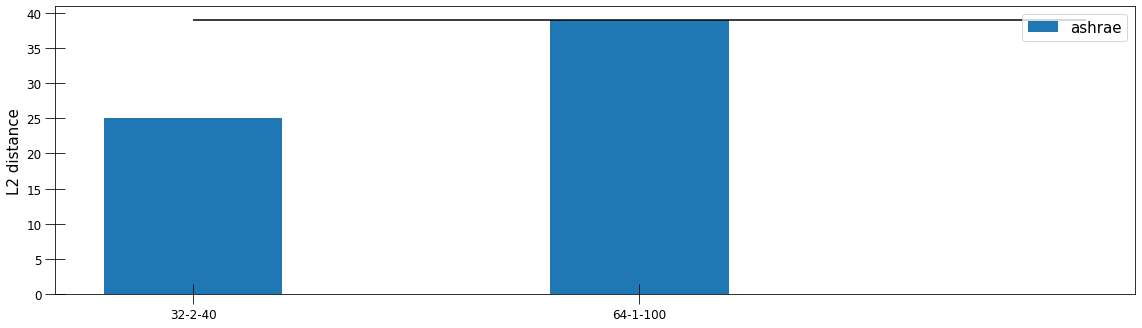

In [5]:
var_all_datasets, var_all_datasets_xaxis = load_metrics("variability")

barplot(var_all_datasets[0], var_all_datasets_xaxis[0], "occutherm", "L2 distance")
barplot(var_all_datasets[1], var_all_datasets_xaxis[1], "cresh", "L2 distance")
barplot(var_all_datasets[2], var_all_datasets_xaxis[2], "ashrae", "L2 distance")


## Diversity of generated samples
![accuracy](images/validation_diversity.jpeg)

[30.560560483123865, 34.213150333613584, 37.00910067788713, 34.3903127609314]
[17.31736756812123, 21.27398346632123, 20.541137513311337]
[15.868162306586795, 17.264614563079437]
[[30.560560483123865, 34.213150333613584, 37.00910067788713, 34.3903127609314], [17.31736756812123, 21.27398346632123, 20.541137513311337], [15.868162306586795, 17.264614563079437]]


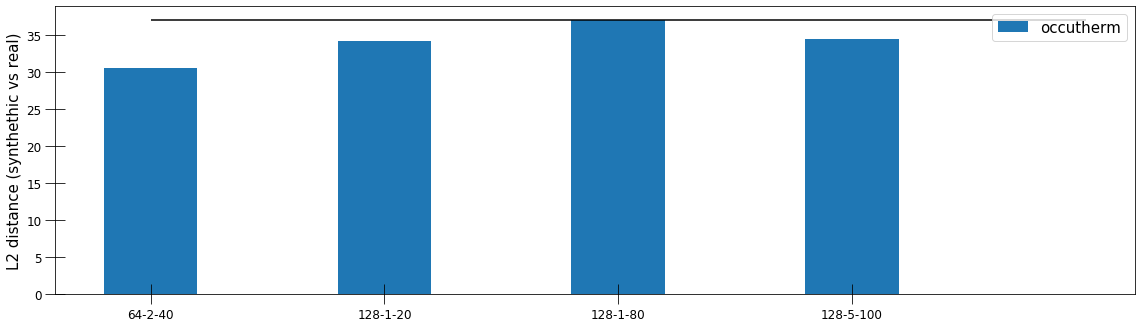

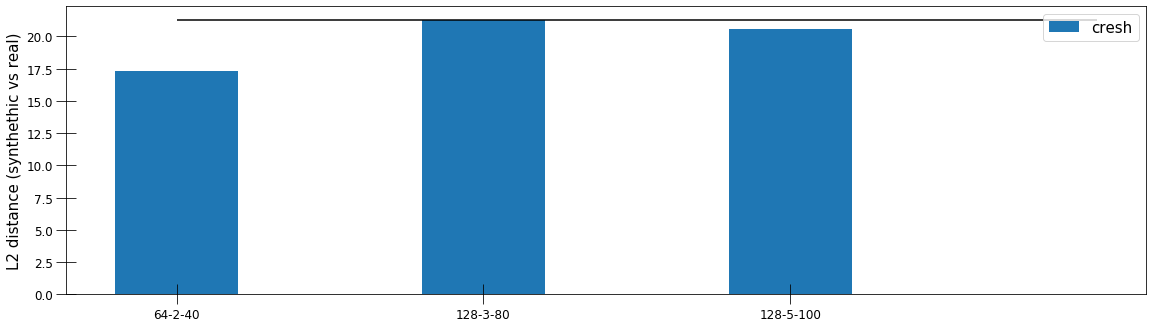

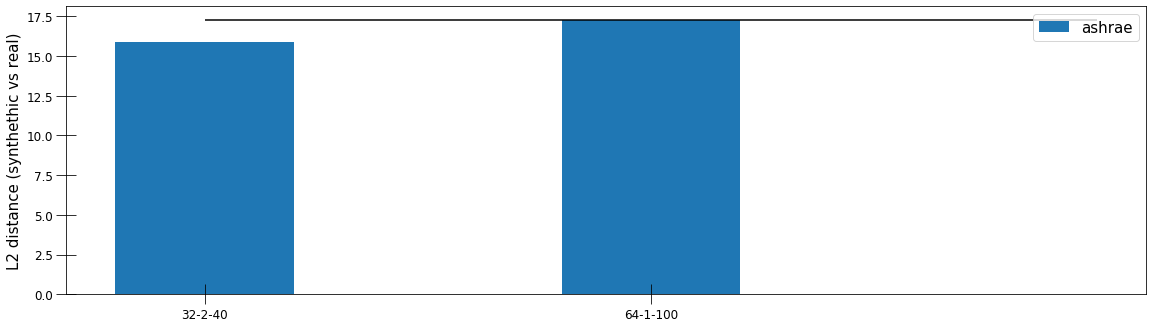

In [6]:
diversity_all_datasets, diversity_all_datasets_xaxis = load_metrics("diversity")

barplot(diversity_all_datasets[0], diversity_all_datasets_xaxis[0], "occutherm", "L2 distance (synthethic vs real)")
barplot(diversity_all_datasets[1], diversity_all_datasets_xaxis[1], "cresh", "L2 distance (synthethic vs real)")
barplot(diversity_all_datasets[2], diversity_all_datasets_xaxis[2], "ashrae", "L2 distance (synthethic vs real)")


## Quality of the final Classification
![accuracy](images/validation_classification.jpeg)

[0.6342874180083482, 0.6360166964818128, 0.6347644603458557, 0.6298747763864043]
[0.672063492063492, 0.6667724867724868, 0.6682539682539682]
[0.4307078313253012, 0.42539156626506025]
[[0.6342874180083482, 0.6360166964818128, 0.6347644603458557, 0.6298747763864043], [0.672063492063492, 0.6667724867724868, 0.6682539682539682], [0.4307078313253012, 0.42539156626506025]]


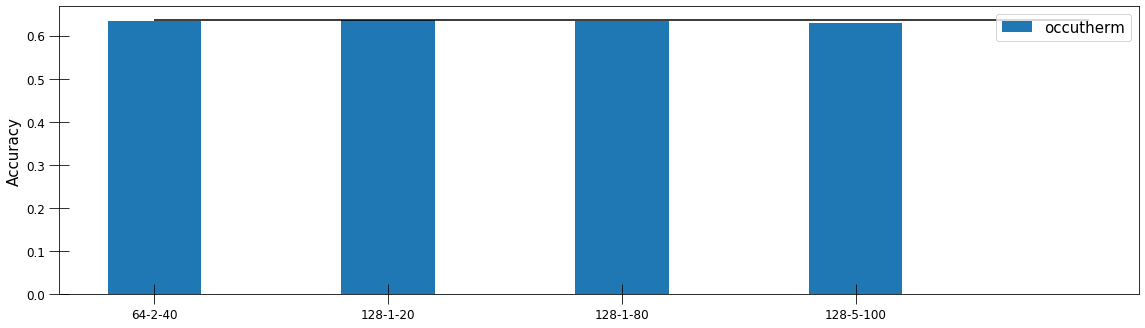

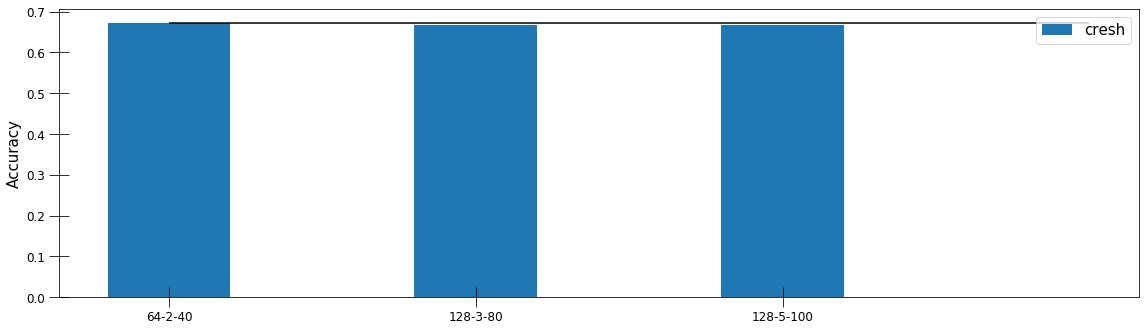

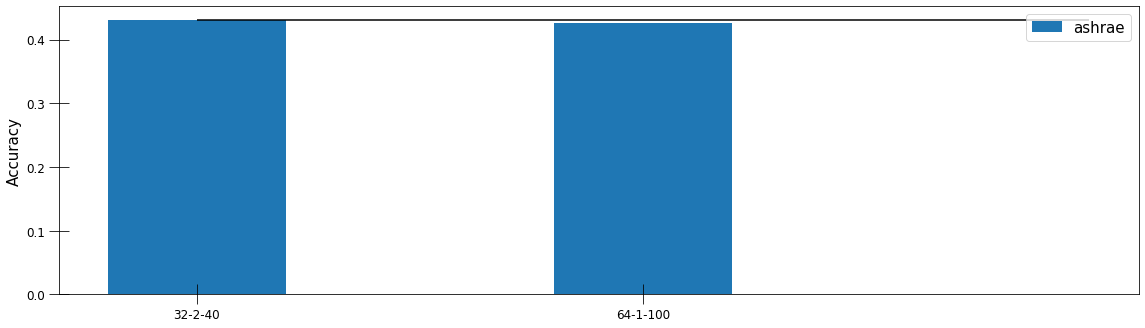

In [7]:
class_all_datasets, class_all_datasets_xaxis = load_metrics("classification_test")

barplot(class_all_datasets[0], class_all_datasets_xaxis[0], "occutherm", "Accuracy")
barplot(class_all_datasets[1], class_all_datasets_xaxis[1], "cresh", "Accuracy")
barplot(class_all_datasets[2], class_all_datasets_xaxis[2], "ashrae", "Accuracy")
